**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, although it seems that you've got confused in some tasks. Hopefully, my comments will help to clarify the tasks. Good luck!

<div class="alert alert-info" role="alert">
Dear Reviewer,

<br>Nice to e-meet you. 

<br>This project was different in that the project's author was kind enough to prepare a template with precode. I followed the template wherever it was available in order to practise reading someone else's code, and supplemented with my code where it was requested. 
    
<br>Also, a note - please restart the kernel after the installation of seaborn to avoid errors that some graphs are not recognised (e.g. histplot).
    
<br>Thank you for reviewing my work.

<br>Rena Bracha
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Ok, thanks for the heads-up!
	  
</div>

<div class="alert alert-info" role="alert">
Hi Dmitry! 

<br>Thank you for going over my project neatly as always. :) I have tried to respond to your comments - they are marked with the "v.2" suffix. 
    
<br>Thank you again!

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
You're welcome! You did an excellent job! There's just one last tiny correction needed, but I promise it will be very easy :)
	  
</div>

<div class="alert alert-info" role="alert">
Hi Dmitry! 

<br>OK, just one more time - please jump to my comments suffixed with "v.3". 
    
<br>Thank you!

</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>
	  
The project is accepted now! Keep up the good work on the next sprint! :)
	  
</div>

# Sure Tomorrow Insurance Company Tasks by Machine Learning

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Tables of Contents <a class="anchor" id="table_of_contents"></a>

* [Data Processing & Exploration](#chapter1)
    * [Initialization](#section_1_1)
    * [Load Data](#section_1_2)
    * [EDA](#section_1_3)
* [Work on each task and answer the questions posed in the project template](#chapter2)
    * [Task 1. Similar Customers](#section_2_1)
    * [Task 2. Is Customer Likely to Receive Insurance Benefit?](#section_2_2)
    * [Task 3. Regression (with Linear Regression)](#section_2_3)
    * [Task 4. Obfuscating Data](#section_2_4)
    * [Proof That Data Obfuscation Can Work with LR](#section_2_5)    
    * [Test Linear Regression With Data Obfuscation](#section_2_6)    
* [Draw conclusions based on your experience working on the project.](#chapter3)

# Data Preprocessing & Exploration

## Initialization

In [2]:
!pip install scikit-learn --upgrade

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (1.0.1)


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestNeighbors
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display


# import sys so no warnings will be issued
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# various libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth
from numpy import sqrt, argmax, mean, absolute, std

# for graph and chart plotting
import matplotlib.pyplot as plt

# restart the kernel after the installation to avoid errors that some graphs are not recognised (e.g. histplot)
#!pip install seaborn --upgrade
!pip install -U seaborn
import seaborn as sns

# for spliting the dataset for training, validation and testing
from sklearn.model_selection import train_test_split

# import the scikit-learn module for calculating various performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.metrics import multilabel_confusion_matrix

# for optimising hyperparameter
from sklearn.model_selection import GridSearchCV

# for label encoding, feauture scaling
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# for feature selection 
from sklearn.feature_selection import chi2 # categorical variables

# for imputing missing values
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# for checking collinearity between features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for evaluating information gain for feature selection and feature importance
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import mutual_info_classif

# for creating pipelines
from sklearn.pipeline import Pipeline

# cross validate models
from sklearn.model_selection import cross_val_score

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [6]:
# enable data file loading in two environments: one local and one on the Platform
# automatically detect the delimiter in the csv file
# load the first 500 rows for starters
try:
    data = pd.read_csv('insurance_us.csv', sep = ',', nrows=500)
except:
    data = pd.read_csv('/datasets/insurance_us.csv', sep = ',', nrows=500)

In [7]:
# look at the first 5 rows
display(data.head())

# check the data types
display(data.info())

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Gender                500 non-null int64
Age                   500 non-null float64
Salary                500 non-null float64
Family members        500 non-null int64
Insurance benefits    500 non-null int64
dtypes: float64(2), int64(3)
memory usage: 19.7 KB


None

* There are no long text values or potential categorical values. There will be no substantial savings in memory usages by converting the data types. 

Skipping optimisation...

In [107]:
# load the data files in full
# convert the 'date' variable to datetime data type
try:
    data = pd.read_csv('insurance_us.csv', sep=',')
except:
    data = pd.read_csv('/datasets/insurance_us.csv', sep=',')

Rename the colums to make the code look more consistent with its style.

In [108]:
data = data.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [109]:
data.sample(10)

,gender,age,income,family_members,insurance_benefits
891,1,39.0,44900.0,1,0
3347,0,27.0,31200.0,2,0
3867,1,36.0,22300.0,2,0
1276,1,23.0,41900.0,2,0
2005,0,30.0,33900.0,0,0
2783,0,39.0,57800.0,1,0
4710,1,30.0,37600.0,6,0
4602,1,23.0,35300.0,1,0
2811,1,27.0,40100.0,2,0
607,1,38.0,44100.0,1,0


In [110]:
# get a first impression of the datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null float64
income                5000 non-null float64
family_members        5000 non-null int64
insurance_benefits    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [111]:
# fix 'Age' data type from float to int
data['age'] = data['age'].astype(int)

# verify it worked
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null int64
income                5000 non-null float64
family_members        5000 non-null int64
insurance_benefits    5000 non-null int64
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


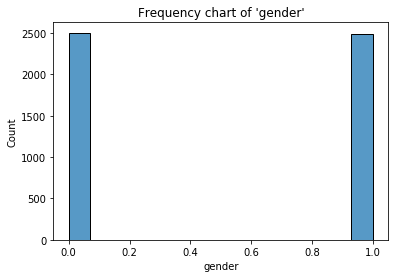

In [112]:
sns.histplot(data['gender'])
plt.title("Frequency chart of 'gender'")
plt.show();

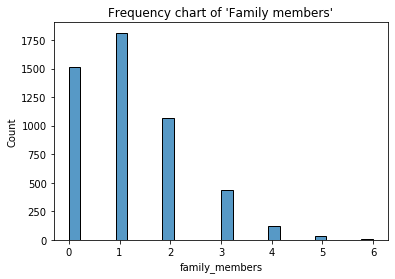

In [113]:
sns.histplot(data['family_members'])
plt.title("Frequency chart of 'Family members'")
plt.show();

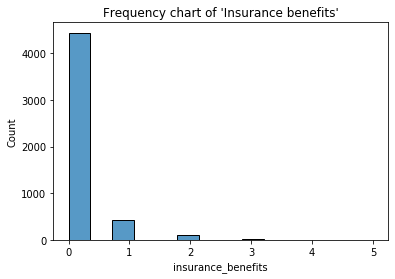

In [114]:
sns.histplot(data['insurance_benefits'])
plt.title("Frequency chart of 'Insurance benefits'")
plt.show();

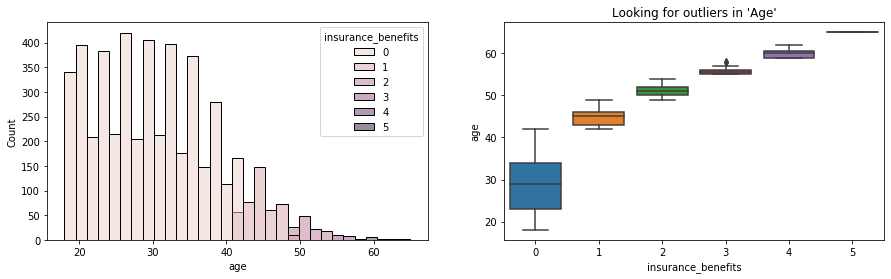

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(x="age", hue="insurance_benefits", data=data, ax=ax[0])
plt.title("Frequency chart of 'Age'")
sns.boxplot(x="insurance_benefits", y="age", data=data, ax=ax[1]) 
plt.title("Looking for outliers in 'Age'");
plt.show();

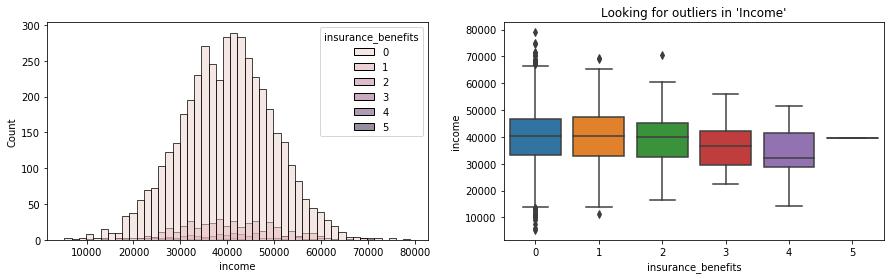

In [116]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(x="income", hue="insurance_benefits", data=data, ax=ax[0])
plt.title("Frequency chart of 'Income'")
sns.boxplot(x="insurance_benefits", y="income", data=data, ax=ax[1]) 
plt.title("Looking for outliers in 'Income'");
plt.show();         

In [120]:
print(data.duplicated(keep=False).sum())
data[data.duplicated(keep=False)].sort_values(by='income', ascending=False)

300


,gender,age,income,family_members,insurance_benefits
1742,1,28,59900.0,0,0
1418,1,28,59900.0,0,0
2231,0,33,59300.0,2,0
1042,0,33,59300.0,2,0
2465,0,40,54000.0,2,0
...,...,...,...,...,...
4230,0,32,25600.0,1,0
361,0,50,24700.0,1,2
2869,0,50,24700.0,1,2
2955,1,32,21600.0,0,0


* Dataset's shape: 5000 rows, 5 columns
* No missing values
* 153 complete duplicates but their deletion does not affect the data distributions at all, so leaving them in. 


* Features: insured person's gender, age, salary, and number of family members.
* Target: number of insurance benefits received by an insured person over the last five years.


* We will perform feature scaling on 'Age' and 'Salary' to standardize the values. 


* 'Gender': we do not know which is female and which is male, but the distribution is pretty well balanced between the two values.
* 'Family members': "a family with zero members" is the second largest. This does not make any sense, so perhaps, this should be interpreted as "the number of people living within the families who are insured". If so, then no or only one member of the family tends to be insured. 
* 'Insurance benefits' (our target variable)
<br>o The vast majority of insured people did not receive any insurance benefits in the last five years.
<br>o There are 5 categories and we have a multi-class classification problem. 
<br>o There are 5 categories and we have a class imbalance. 
* 'Age'
<br>o The distribution is skewed to the left, indicating that younger people tend to purchase an insurance product than older people.
<br>o No outliers.
<br>o Up to around the age of 42, 'Insurance benefits' = 0; all but 'Insurance benefits' =0 are observed above the age of 42.
* 'Salary'
<br>o Normally distributed
<br>o Some outliers for some low 'Insurance benefits' values. We will not remove them since they do not seem abnormal. 


Let us check for multicollinearity. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Nice observations!
	  
</div>

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

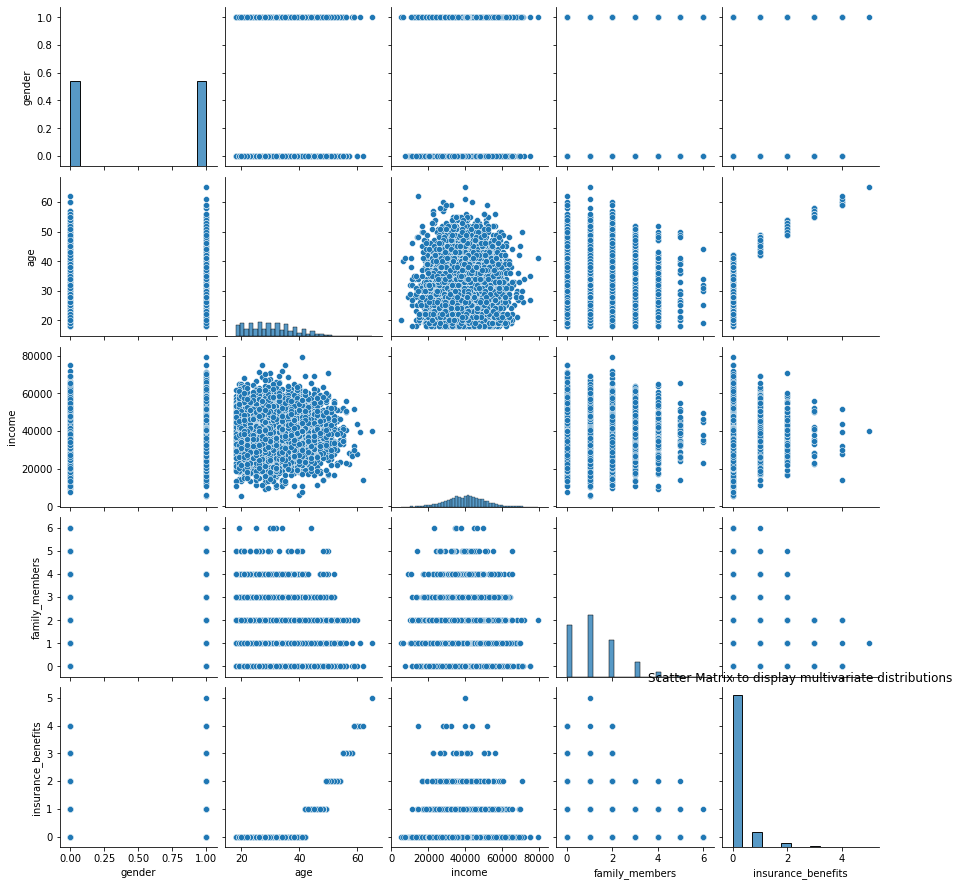

In [18]:
# draw the scatter matrix to see the multivariate distribution of the features and the target
sns.pairplot(data)
plt.title("Scatter Matrix to display multivariate distributions")
plt.show();

* The 'Age' feature variable has the strongest correlation with the target variable.  
* No outliers are observed.


 Let us look at the correlation matrix. Using Spearman's correlation coefficients since most of the variables do not show a normal distribution.

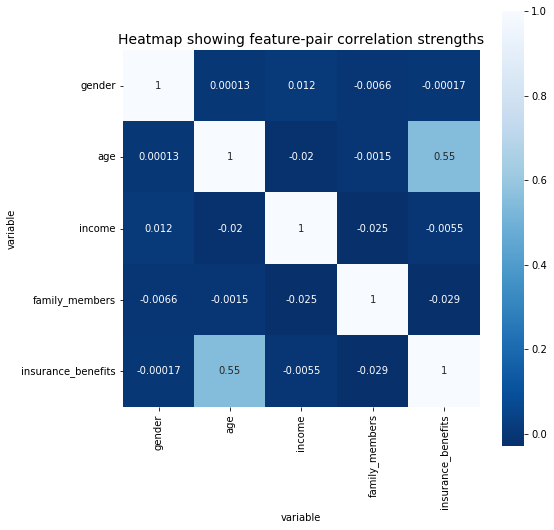

In [19]:
# draw up a correlation heatmap
correlation = data.corr(method='spearman')
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues_r') 
plt.title("Heatmap showing feature-pair correlation strengths", fontsize=14)
plt.ylabel("variable")
plt.xlabel("variable");

* The correlation between 'Age' and 'Insurance benefits' is confirmed. 

[Project Guidance] Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Work on each task and answer the questions posed in the project template <a class="anchor" id="section_1_3"></a>

[Go back to the Table of Contents](#table_of_contents)

## Task 1. Similar Customers

Find customers who are similar to a given customer. This will help the company's agents with marketing.

[Project Guidance] In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

[Project Guidance] Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

<div class="alert alert-info" role="alert">
<b>Question</b>

<br>In the Project Guideline above, it says "The number of received insurance benefits should not be taken into account for this task.". But to make the get_knn() function below work, it has to be fitted with the target variable as well (i.e. y_train). 
    
<br>What does the instruction mean?

</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
The link in the task description above is to [sklearn.neighbors.NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors), which is the unsupervised algorithm (i.e. doesn't use any target variable). If the comments in the code said `KNeighborsRegressor`, it's just a mistype I guess.
    
It's okay to use `KNeighborsRegressor` too though, because unless you use `predict`, targets are never touched: fitting `KNeighborsRegressor` basically just stores the train set, and `kneighbors` method only uses the feature space.
	  
</div>


<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

<br>I knew it! I saw the link lead to the "unsupervised version", but then I told myself it couldn't be, because we were still in the supervised learning chapter. The contradictory messages threw me off, but I went ahead with KNeighborsRegressor. 
    
<br>You write, "It's okay to use KNeighborsRegressor too though, because unless you use predict, targets are never touched: fitting KNeighborsRegressor basically just stores the train set, and kneighbors method only uses the feature space.", and that's exactly how I reasoned.  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Ok, no problem!
	  
</div>

In [22]:
# [Project Guidance] make a list of feature variables and exclude the target variable
feature_names = ['gender', 'age', 'income', 'family_members']

In [23]:
# [Project Guidance] write a function based on sklearn's KNeighborsRegressor class
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbours

    :param df: pandas DataFrame used to find similar objects within
    :param n: object number for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    nbrs = KNeighborsRegressor(metric=metric) # <your code here>
    nbrs.fit(df[feature_names], df.drop(feature_names, axis=1))
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)

    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    df_res = df_res.drop(index=df_res.index[0], axis=0)
    
    return df_res

[Project Guidance] Scaling the data with the [MaxAbsScaler]

In [24]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(data[feature_names].to_numpy())

data_scaled = data.copy()
data_scaled.loc[:, feature_names] = transformer_mas.transform(data[feature_names].to_numpy())

In [25]:
data_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
1797,0.0,0.323077,0.602532,0.333333,0
3925,1.0,0.446154,0.167089,0.500000,0
829,0.0,0.323077,0.450633,0.333333,0
2559,0.0,0.692308,0.784810,0.333333,1
2595,0.0,0.476923,0.491139,0.166667,0


[Project Guidance] Now, let's get similar records for a given one for every combination

In [26]:
%time
print()

# Data not scaled + Euclidean distance metric
df = data
n = 5 # the n-th customer for whom other similar customers are going to be searched 
k = 10 # the number of the nearest neighbours to return (including the n-th customer)
metric = 'euclidean'

print('the {:}-th target customer:'.format(n))
print(df.iloc[n][feature_names])
print()
print('the', k, 'most similar customers:')
get_knn(df, n, k, metric)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs

the 5-th target customer:
gender                1.0
age                  43.0
income            41000.0
family_members        2.0
Name: 5, dtype: float64

the 10 most similar customers:


,gender,age,income,family_members,insurance_benefits,distance
1995,0,45,41000.0,0,1,3.000000
3972,1,40,41000.0,1,0,3.162278
3801,0,46,41000.0,2,1,3.162278
4763,1,46,41000.0,1,1,3.162278
2759,0,47,41000.0,3,1,4.242641
2717,0,37,41000.0,0,0,6.403124
3434,1,36,41000.0,2,0,7.000000
1740,0,36,41000.0,1,0,7.141428
2876,0,35,41000.0,2,0,8.062258


In [27]:
%time
print()

# Data not scaled + Manhattan distance metric
df = data
n = 5 # the n-th customer for whom other similar customers are going to be searched 
k = 10 # the number of the nearest neighbours to return (including the n-th customer)
metric = 'manhattan'

print('the {:}-th target customer:'.format(n))
print(df.iloc[n][feature_names])
print()
print('the', k, 'most similar customers:')
get_knn(df, n, k, metric)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs

the 5-th target customer:
gender                1.0
age                  43.0
income            41000.0
family_members        2.0
Name: 5, dtype: float64

the 10 most similar customers:


,gender,age,income,family_members,insurance_benefits,distance
4763,1,46,41000.0,1,1,4.0
3972,1,40,41000.0,1,0,4.0
3801,0,46,41000.0,2,1,4.0
1995,0,45,41000.0,0,1,5.0
2759,0,47,41000.0,3,1,6.0
3434,1,36,41000.0,2,0,7.0
2717,0,37,41000.0,0,0,9.0
2876,0,35,41000.0,2,0,9.0
1740,0,36,41000.0,1,0,9.0


In [28]:
%time
print()

# Data scaled + Euclidean distance metric
df = data_scaled
n = 5 # the n-th customer for whom other similar customers are going to be searched 
k = 10 # the number of the nearest neighbours to return (including the n-th customer)
metric = 'euclidean'

print('the {:}-th target customer:'.format(n))
print(df.iloc[n][feature_names])
print()
print('the', k, 'most similar customers:')
get_knn(df, n, k, metric)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs

the 5-th target customer:
gender            1.000000
age               0.661538
income            0.518987
family_members    0.333333
Name: 5, dtype: float64

the 10 most similar customers:


,gender,age,income,family_members,insurance_benefits,distance
1147,1.0,0.646154,0.516456,0.333333,0,0.015592
4074,1.0,0.661538,0.501266,0.333333,1,0.017722
1019,1.0,0.646154,0.501266,0.333333,0,0.023468
2962,1.0,0.630769,0.520253,0.333333,0,0.030795
2128,1.0,0.692308,0.512658,0.333333,1,0.031413
106,1.0,0.692308,0.526582,0.333333,1,0.031693
2206,1.0,0.692308,0.530380,0.333333,1,0.032811
2352,1.0,0.692308,0.531646,0.333333,1,0.033271
719,1.0,0.630769,0.532911,0.333333,0,0.033773


In [29]:
%time
print()

# Data scaled + Manhattan distance metric
df = data_scaled
n = 5 # the n-th customer for whom other similar customers are going to be searched 
k = 10 # the number of the nearest neighbours to return (including the n-th customer)
metric = 'manhattan'

print('the {:}-th target customer:'.format(n))
print(df.iloc[n][feature_names])
print()
print('the', k, 'most similar customers:')
get_knn(df, n, k, metric)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs

the 5-th target customer:
gender            1.000000
age               0.661538
income            0.518987
family_members    0.333333
Name: 5, dtype: float64

the 10 most similar customers:


,gender,age,income,family_members,insurance_benefits,distance
4074,1.0,0.661538,0.501266,0.333333,1,0.017722
1147,1.0,0.646154,0.516456,0.333333,0,0.017916
2962,1.0,0.630769,0.520253,0.333333,0,0.032035
1019,1.0,0.646154,0.501266,0.333333,0,0.033106
2128,1.0,0.692308,0.512658,0.333333,1,0.037098
106,1.0,0.692308,0.526582,0.333333,1,0.038364
2206,1.0,0.692308,0.530380,0.333333,1,0.042162
2352,1.0,0.692308,0.531646,0.333333,1,0.043427
719,1.0,0.630769,0.532911,0.333333,0,0.044693


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Put your answer here.

The above is the result of finding 10 most simialr neighbours to the 5-th observation in the 'data' dataset. Four cases were tested:
<br>1) Data is not scaled; distance metric = Euclidean 
<br>2) Data is not scaled; distance metric = Manhattan
<br>3) Data is scaled; distance metric = Euclidean
<br>4) Data is scaled; distance metric = Manhattan

* The same k most similar neighbours appeared in the list regardless of the distance metric used, but the ordering was more different when the data was not scaled. 
<br>o When the data was not scaled, 3 out of 10 neighbours appeared in the same order in the two distance metrics.
<br>o When the data was scaled, 5 out of 10 neighbours appeared in the same order in the two distance metrics.


* The CPU Time was the same for all four cases. But there was a difference in the Wall Time. 
<br>o When the data was not scaled, the Manhattan ran faster than the Euclidean.
<br>o When the data was scaled, the Euclidean ran faster than the Manhattan.
<br>o The Euclidean ran faster when the data was scaled, compared to when the data was not scaled.
<br>o The Manhattan ran faster when the data was not scaled, compared to when the data was scaled.


* Given the list of 10 most similar neighbours proposed by the model, the Manhattan seems to produce a more accurate result than the Euclidean, regardless of whether the data is scaled or not. 

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

Put your answer here.

* The Manhattan result from the non-scaled data has nothing in common with the Mahattan result from the scaled data. The two lists of 10 similar neighbours are completely different. 

* The same can be said about the Euclidean results. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Good! The most important difference between kNN fit on scaled vs unscaled data is that on unscaled data if some feature has a much bigger magnitude than other features, it will dominate the distance metric (the others will contribute very little). As such, distance-based algorithms are very sensitive to feature scales.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

<br>Understood! 
    
<br>So I experimented with NearestNeighbors, and the results were identical to when I used KNeighborsRegressor().
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Yeah, that's to be expected, but it's nice that you confirmed it!
    
	  
</div>

In [30]:
# write a function based on sklearn's NearestNeighbors class
def get_knn2(df, n, k, metric):
    
    """
    Returns k nearest neighbours

    :param df: pandas DataFrame used to find similar objects within
    :param n: object number for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    nbrs = NearestNeighbors(metric=metric) # <your code here>
    nbrs.fit(df[feature_names], df.drop(feature_names, axis=1))
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)

    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    df_res = df_res.drop(index=df_res.index[0], axis=0)
    
    return df_res

In [31]:
%time
print()

# Data not scaled + Euclidean distance metric
df = data
n = 5 # the n-th customer for whom other similar customers are going to be searched 
k = 10 # the number of the nearest neighbours to return (including the n-th customer)
metric = 'euclidean'

print('the {:}-th target customer:'.format(n))
print(df.iloc[n][feature_names])
print()
print('the', k, 'most similar customers:')
get_knn2(df, n, k, metric)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs

the 5-th target customer:
gender                1.0
age                  43.0
income            41000.0
family_members        2.0
Name: 5, dtype: float64

the 10 most similar customers:


,gender,age,income,family_members,insurance_benefits,distance
1995,0,45,41000.0,0,1,3.000000
3972,1,40,41000.0,1,0,3.162278
3801,0,46,41000.0,2,1,3.162278
4763,1,46,41000.0,1,1,3.162278
2759,0,47,41000.0,3,1,4.242641
2717,0,37,41000.0,0,0,6.403124
3434,1,36,41000.0,2,0,7.000000
1740,0,36,41000.0,1,0,7.141428
2876,0,35,41000.0,2,0,8.062258


In [32]:
%time
print()

# Data not scaled + Manhattan distance metric
df = data
n = 5 # the n-th customer for whom other similar customers are going to be searched 
k = 10 # the number of the nearest neighbours to return (including the n-th customer)
metric = 'manhattan'

print('the {:}-th target customer:'.format(n))
print(df.iloc[n][feature_names])
print()
print('the', k, 'most similar customers:')
get_knn2(df, n, k, metric)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs

the 5-th target customer:
gender                1.0
age                  43.0
income            41000.0
family_members        2.0
Name: 5, dtype: float64

the 10 most similar customers:


,gender,age,income,family_members,insurance_benefits,distance
4763,1,46,41000.0,1,1,4.0
3972,1,40,41000.0,1,0,4.0
3801,0,46,41000.0,2,1,4.0
1995,0,45,41000.0,0,1,5.0
2759,0,47,41000.0,3,1,6.0
3434,1,36,41000.0,2,0,7.0
2717,0,37,41000.0,0,0,9.0
2876,0,35,41000.0,2,0,9.0
1740,0,36,41000.0,1,0,9.0


In [33]:
%time
print()

# Data scaled + Euclidean distance metric
df = data_scaled
n = 5 # the n-th customer for whom other similar customers are going to be searched 
k = 10 # the number of the nearest neighbours to return (including the n-th customer)
metric = 'euclidean'

print('the {:}-th target customer:'.format(n))
print(df.iloc[n][feature_names])
print()
print('the', k, 'most similar customers:')
get_knn2(df, n, k, metric)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs

the 5-th target customer:
gender            1.000000
age               0.661538
income            0.518987
family_members    0.333333
Name: 5, dtype: float64

the 10 most similar customers:


,gender,age,income,family_members,insurance_benefits,distance
1147,1.0,0.646154,0.516456,0.333333,0,0.015592
4074,1.0,0.661538,0.501266,0.333333,1,0.017722
1019,1.0,0.646154,0.501266,0.333333,0,0.023468
2962,1.0,0.630769,0.520253,0.333333,0,0.030795
2128,1.0,0.692308,0.512658,0.333333,1,0.031413
106,1.0,0.692308,0.526582,0.333333,1,0.031693
2206,1.0,0.692308,0.530380,0.333333,1,0.032811
2352,1.0,0.692308,0.531646,0.333333,1,0.033271
719,1.0,0.630769,0.532911,0.333333,0,0.033773


In [34]:
%time
print()

# Data scaled + Manhattan distance metric
df = data_scaled
n = 5 # the n-th customer for whom other similar customers are going to be searched 
k = 10 # the number of the nearest neighbours to return (including the n-th customer)
metric = 'manhattan'

print('the {:}-th targ@et customer:'.format(n))
print(df.iloc[n][feature_names])
print()
print('the', k, 'most similar customers:')
get_knn2(df, n, k, metric)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs

the 5-th targ@et customer:
gender            1.000000
age               0.661538
income            0.518987
family_members    0.333333
Name: 5, dtype: float64

the 10 most similar customers:


,gender,age,income,family_members,insurance_benefits,distance
4074,1.0,0.661538,0.501266,0.333333,1,0.017722
1147,1.0,0.646154,0.516456,0.333333,0,0.017916
2962,1.0,0.630769,0.520253,0.333333,0,0.032035
1019,1.0,0.646154,0.501266,0.333333,0,0.033106
2128,1.0,0.692308,0.512658,0.333333,1,0.037098
106,1.0,0.692308,0.526582,0.333333,1,0.038364
2206,1.0,0.692308,0.530380,0.333333,1,0.042162
2352,1.0,0.692308,0.531646,0.333333,1,0.043427
719,1.0,0.630769,0.532911,0.333333,0,0.044693


## Task 2. Is Customer Likely to Receive Insurance Benefit?

Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?

[Project Guidance] In terms of machine learning we can look at this like a binary classification task.

[Project Guidance] With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [89]:
# calculate the target

data['insurance_benefits_received'] = data['insurance_benefits'].clip(0, 1) #<your code here>
data['insurance_benefits_received'].sample(10)

2448    0
4391    0
3009    0
742     0
3073    1
2131    1
4220    0
3848    0
1025    0
1976    1
Name: insurance_benefits_received, dtype: int64

In [90]:
# check for the class imbalance with value_counts()

data['insurance_benefits_received'].value_counts() # <your code here>

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

* The problem has been converted into a binary classification kind.
* The 0s outweight 1s by more than 8 times. 

In [83]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    #cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    cm = confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

# [my addition] print the numbers with the labels
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    print('True negatives:', tn)
    print('False positives:', fp)
    print('False negatives:', fn)
    print('True positives:', tp)
    print('Precision:', tp/(tp + fp))
    print('Recall:', tp/(tp + fn))
    print()

In [44]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [64]:
# the proportion of 0s and 1s when P=0
prob0=rnd_model_predict(0, 5000, seed=42)
pd.Series(prob0).value_counts() # no 1s

0    5000
dtype: int64

In [65]:
# the proportion of 0s and 1s when P=0.1128
prob = data['insurance_benefits_received'].sum() / len(data)
print(prob)
prob_any=rnd_model_predict(prob, 5000, seed=42)
pd.Series(prob_any).value_counts() # 8 times as many 0s as 1s

0.1128


0    4454
1     546
dtype: int64

In [66]:
# the proportion of 0s and 1s when P=0.5
prob0_5=rnd_model_predict(0.5, 5000, seed=42)
pd.Series(prob0_5).value_counts() # 0s and 1s in 50/50

0    2545
1    2455
dtype: int64

In [67]:
# the proportion of 0s and 1s when P=1
prob1=rnd_model_predict(1, 5000, seed=42)
pd.Series(prob1).value_counts() # no 0s

1    5000
dtype: int64

<div class="alert alert-info" role="alert">
<s><b>Student's Comment</b>

<br>1) The precode of `eval_classifier(data['insurance_benefits_received'], y_pred_rnd)` causes the error, `ValueError: Classification metrics can't handle a mix of continuous and binary targets`. 


This is because we are trying to compare:
<br>`data['insurance_benefits_received']` which is a Series of float values `([0.    , 0.0002, 0.    , ..., 0.    , 0.    , 0.    ])
    
with:
<br>`rnd_model_predict(P, 5000)` which is an array of float values when P = `data['insurance_benefits_received'].sum() / len(data)`
    
   
<br>2) It says, `if you have an issue with the following line, restart the kernel and run the notebook again`, but it did not help.
    
<br>3) Since the target is a multi-class, if I do not specify `average=None` in the f1_score method, it causes the error, `ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].`. 
    
<br>So I modified the code. Please see "Student's Comment (continued from above)" below.
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Looks like you've got confused a bit! As the task description says, we'd like to try applying kNN (and a dummy model) to a *binary classification* problem (that is, classification with two classes: 0 and 1). So `insurance_benefits_received` should be equal to 1 if `insurance_benefits` is greater than 0, and 0 otherwise. But your code just rescaled the `insurance_benefits` values. That's why the code here and further below was not working.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

<br>OK, so I was thinking too much - like the 'NearestNeighbors' and 'KNeighborsRegressor' were being used "seemingly interchangeably" in the previous section, I thought "binary classification" was being used in a general sense even if we had a multi-class classification problem at hand. 
    
<br>I converted the problem into a binary classification kind and tackled it again below. 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
But if there were more than two classes, it couldn't be binary :)
	  
</div>

In [91]:
for P in [0, data['insurance_benefits_received'].sum() / len(data), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, 5000) # <your code here> 
        
    eval_classifier(data['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]
True negatives: 0.8872
False positives: 0.0
False negatives: 0.1128
True positives: 0.0
Precision: nan
Recall: 0.0


The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]
True negatives: 0.7914
False positives: 0.0958
False negatives: 0.0994
True positives: 0.0134
Precision: 0.12271062271062272
Recall: 0.11879432624113476


The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]
True negatives: 0.456
False positives: 0.4312
False negatives: 0.053
True positives: 0.0598
Precision: 0.12179226069246435
Recall: 0.5301418439716312


The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]
True negatives: 0.0
False positives: 0.8872
False negatives: 0.0
True positives: 0.1128
Precision: 0.1128
Recall: 1.0




<div class="alert alert-info" role="alert">
<s><b>Student's Comment (continued from above)</b>

<br>To make the precode work, 
* adding `average=None` to the `f1_score()` method in the `eval_classifier()` function, and
* changing the input to the `eval_classifier()` function from `data['insurance_benefits_received']` to `data['insurance_benefits']`.
    
<br>The code runs but it is meaningless since the 'raw' data in data['insurance_benefits'] (i.e. 0, 1, 2, 3, 4 or 5) is being compared to a randomly generated set of probabilities.
</div>

<div class="alert alert-warning">
<s><b>Reviewer's comment</b>
	  
See comment above
   
	  
</div>

Since
* F1 score = 2 * ((precision * recall) / (precision + recall))
* recall = TP / (TP + FN)...concerns both the number of 1s and 0s
* precision = TP / (TP + FP)...concerns only the number of 1s
* 0 / any number = 0 


So, 
* If either precision or recall scores zero, the whole F1 score turns zero. This is the first case where the probability = 0 in which all the predictions are 0s. F1 score is supposed to be a harmonic mean of the precision and recall, and yet F1 = 0 because there are no positive cases in the predictions, and therefore recall = 0.


* The contrasting case is the last one where the probability = 1 in which all the predictions are 1s. There are only positive cases in the predictions, and therefore recall = 1, but F1 is only 0.20 because the large number of false positives results in a poor precision, which drags the F1 down. 

In the random prediction-number generator, the probability P is the probability of predicting a positive outcome, i.e. recall. In other words, F1 score is heavily dependent on the share of actual positives, and on how imbalanced our training dataset is. 

[Project Guidance] Split the whole data in the 70:30 proportion for the training/testing parts.

In [76]:
# write a function that splits the whole dataset into training and test datasets in the ratio of 70:30
def split_data(source, target_col, train_portion):

        # separate the source dataset into features and target datasets
        X = source.drop([target_col], axis=1)
        y = source[target_col]    
        
        # split the features and target datasets into training and test datasets 
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_portion, random_state=12345)    

        # return all the datasets
        return X_train, X_test, y_train, y_test

In [80]:
train_segment = 0.7 # 1-0.7=0.3 is set aside for test dataset

X_train, X_test, y_train, y_test  = split_data(data, 'insurance_benefits_received', train_segment)
X_train.drop(columns=['insurance_benefits'], inplace=True)
X_test.drop(columns=['insurance_benefits'], inplace=True)

In [81]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (3500, 4)
y_train shape: (3500,)
X_test shape: (1500, 4)
y_test shape: (1500,)


<div class="alert alert-info" role="alert">
<b>Question</b>

<br>To relate to the class imbalance in the dataset, I specified the `stratify` parameter when splitting the dataset into trainig and test datasets, upon which Python issued the error, `ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.`. 

<br>Since there is no Project Instruction regaring upsampling, and I am under the impression that this Project seems to focus on comparing model performance in terms of data scaling, so I am not applying the technique. 
  
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Yeah, you are right, this project is focusing on different things, so it's fine to ignore the class imbalance.
    
In any case, I think you've meant `stratify` parameter, right? Then the problem is that you calculated the target for the task incorrectly (see comment above).
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

<br>Goodness! Yes, I meant to write 'stratify' and not 'specify'. 

<br>I converted and tackled it as a binary classification problem.  
  
</div>

Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. 

In [92]:
# using the original data - the data is not scaled

for k in range(1, 11, 1):   
    print('k:', k)
    k_values.append(k)
    kn_clf = KNeighborsClassifier(n_neighbors=k)
    kn_clf.fit(X_train, y_train)
    pred = kn_clf.predict(X_test)
    eval_classifier(y_test, pred)

k: 1
F1: 0.62
Confusion Matrix
[[0.87133333 0.02      ]
 [0.05133333 0.05733333]]
True negatives: 0.8713333333333333
False positives: 0.02
False negatives: 0.051333333333333335
True positives: 0.05733333333333333
Precision: 0.7413793103448275
Recall: 0.5276073619631902

k: 2
F1: 0.41
Confusion Matrix
[[0.88733333 0.004     ]
 [0.08       0.02866667]]
True negatives: 0.8873333333333333
False positives: 0.004
False negatives: 0.08
True positives: 0.028666666666666667
Precision: 0.8775510204081634
Recall: 0.2638036809815951

k: 3
F1: 0.41
Confusion Matrix
[[0.88       0.01133333]
 [0.07733333 0.03133333]]
True negatives: 0.88
False positives: 0.011333333333333334
False negatives: 0.07733333333333334
True positives: 0.03133333333333333
Precision: 0.734375
Recall: 0.2883435582822086

k: 4
F1: 0.28
Confusion Matrix
[[0.88866667 0.00266667]
 [0.09066667 0.018     ]]
True negatives: 0.8886666666666667
False positives: 0.0026666666666666666
False negatives: 0.09066666666666667
True positives: 0

In [85]:
# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [93]:
# using the original data - the data is not scaled

for k in range(1, 11, 1):   
    print('k:', k)
    kn_clf = KNeighborsClassifier(n_neighbors=k)
    kn_clf.fit(X_train_scaled, y_train)
    pred = kn_clf.predict(X_test_scaled)
    eval_classifier(y_test, pred)

k: 1
F1: 0.96
Confusion Matrix
[[0.88733333 0.004     ]
 [0.00466667 0.104     ]]
True negatives: 0.8873333333333333
False positives: 0.004
False negatives: 0.004666666666666667
True positives: 0.104
Precision: 0.9629629629629629
Recall: 0.9570552147239264

k: 2
F1: 0.93
Confusion Matrix
[[8.90666667e-01 6.66666667e-04]
 [1.33333333e-02 9.53333333e-02]]
True negatives: 0.8906666666666667
False positives: 0.0006666666666666666
False negatives: 0.013333333333333334
True positives: 0.09533333333333334
Precision: 0.9930555555555556
Recall: 0.8773006134969324

k: 3
F1: 0.94
Confusion Matrix
[[0.888      0.00333333]
 [0.00866667 0.1       ]]
True negatives: 0.888
False positives: 0.0033333333333333335
False negatives: 0.008666666666666666
True positives: 0.1
Precision: 0.967741935483871
Recall: 0.9202453987730062

k: 4
F1: 0.90
Confusion Matrix
[[0.88933333 0.002     ]
 [0.01733333 0.09133333]]
True negatives: 0.8893333333333333
False positives: 0.002
False negatives: 0.017333333333333333
Tr

* When the data is not scaled, as k increases, F1 decreases. By the time k = 10, F1 = 0. Precision is high for all values of k, but recall is gets poorer. This is presumably because it becomes more and more difficult to calculate the distane between the data points. 

* In constrast, when the data is scaled, the increase in k hardly affects F1, which remains high, and so are both precision and recall at a near perfect level (very close to 1.0).

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Please try redoing this task as a binary classification problem (see comment above)
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

<br>I converted and tackled it as a binary classification problem. I updated the findings above. 
  
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Ok, very good! Conclusions look good, except, I'm not sure what you meant by `This is presumably because it becomes more and more difficult to calculate the distance between the data points.` Why would it become more difficult to calculate distances? If it did, it would affect the scaled version too, right? The problem is rather that one feature dominates all other features in the metric calculation due to its scale on unscaled data (namely, income), so it basically disregards all other features.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.3</b>

<br>Let me try again - when the dataset is not scaled, one feature that is massive in its magnitude ('income') stands out and is given the heaviest weight of importance. k candidate data points are then captured according to their proximity/similarity to the data point in question in terms of this feature. As k increases, the number of candidate data points increase - all chosen according to the imbalanced criteria - and the target class chosen by majority vote does not match the "correct answer" target class in terms of the other features that were not considered as the choosing criteria. 
  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>
	  
Yep, that's about right!
	  
</div>

## Task 3. Regression (with Linear Regression)

Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.

[Project Guidance] With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

In [121]:
# ORIGINAL
#def eval_regressor(y_true, y_pred):
    
#    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
 #   print(f'RMSE: {rmse:.2f}')
    
  #  r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
   # print(f'R2: {r2_score:.2f}')    

In [122]:
def eval_regressor(y_true, y_pred):
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2 = r2_score(y_true, y_pred)
    print(f'R2: {r2:.2f}')  
    
    # the square root of R2 is the correlation coefficent between the vectors of observed and predicted values
    # this is a measure of dependence between X and y
    sqrt_r2 = np.sqrt(r2_score(y_true, y_pred)) # don't name the output variable and the function the same to avoid errors
    print(f'square root of R2: {sqrt_r2:.2f}')    

[Project Guidance] Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

In [123]:
# ORIGINAL
#class MyLinearRegression:
    
 #   def __init__(self):
        
  #      self.weights = None
    
   # def fit(self, X, y):
        
        # adding the unities
    #    X2 = np.append(np.ones([len(X), 1]), X, axis=1)
     #   self.weights =  # <your code here>

    #def predict(self, X):
        
        # adding the unities
     #   X2 = # <your code here>
      #  y_pred = # <your code here>
        
       # return y_pred

In [124]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.w = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        w = (np.linalg.inv(X2.T.dot(X2))).dot(X2.T).dot(y)
        self.w = w[1:] # <your code here>
        self.w0 = w[0]

    def predict(self, X):
        
        # adding the unities
        #X2 = np.append(np.ones([len(X), 1]), X, axis=1) # <your code here>
        #y_pred = X2.dot(self.w) # <your code here>
        y_pred = X.dot(self.w) + self.w0 # <your code here>
        
        return y_pred

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Linear regression was implemented correctly
	  
</div>

[Project Guidance] Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [125]:
X = data[['age', 'gender', 'income', 'family_members']].to_numpy()
y = data['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [126]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print()
print(X_train) # see what the values look like

X_train shape: (3500, 4)
y_train shape: (3500,)
X_test shape: (1500, 4)
y_test shape: (1500,)

[[2.90e+01 0.00e+00 2.02e+04 0.00e+00]
 [3.70e+01 0.00e+00 3.73e+04 2.00e+00]
 [3.40e+01 0.00e+00 3.23e+04 2.00e+00]
 ...
 [4.10e+01 1.00e+00 4.47e+04 1.00e+00]
 [2.20e+01 0.00e+00 5.01e+04 4.00e+00]
 [1.90e+01 0.00e+00 4.08e+04 0.00e+00]]


In [127]:
# Data is not scaled
lr = MyLinearRegression()

lr.fit(X_train, y_train)
print('parameter weights:', lr.w)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

parameter weights: [ 3.57495491e-02  1.64272726e-02 -2.60743659e-07 -1.16902127e-02]
RMSE: 0.34
R2: 0.43
square root of R2: 0.66


In [129]:
# create a pipeline to perform feature scaling and train the model on a scaled training dataset
lr_pipe = Pipeline([
    ('scaler', StandardScaler()), # feature scaling
    ('model_scaled', MyLinearRegression()) # create an instance of the model
])

# fit the model
lr_pipe.fit(X_train, y_train)
print('parameter weights:', lr_pipe.named_steps['model_scaled'].w)

# test the model on the test dataset that has been scaled
y_test_pred = lr_pipe.predict(X_test)
eval_regressor(y_test, y_test_pred)

parameter weights: [ 0.30292778  0.0082117  -0.00258294 -0.01271039]
RMSE: 0.34
R2: 0.43
square root of R2: 0.66


<div class="alert alert-info" role="alert">
<s><b>Question</b>

<br>I cannot figure out why a list of NaNs is displayed at the end of the last cross validation cycle. Could you please let me know why this might be?
  
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
This is because the scoring function `eval_regressor` you passed to `make_scorer` doesn't return anything, so the scores are NaN for all folds. By the way, scikit-learn supports quite a few different metrics out of the box (see [docs](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)). For example to use $R^2$, we can just set `scoring='r2'`. Although I'm not sure why we need to use cross-validation here at all, evaluating on test seems enough.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

<br>I used the precode in the eval_regressor function. In the original version, it was calculating the square root of R squared and calling it "r2", which bothered me, and I wanted to calculate R squared as well, so I changed the name of the former to "sqrt_r2".
   
    
<br>Of course! I don't need the cross validation. I was going to use the scaled data, and remembered that I had to use a pipeline. But I can still use the pipeline without cross validation. I have removed it.
  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

> I used the precode in the eval_regressor function. 
    
Yeah, I guess, the function was meant to just print the values of the metrics, but to use it with make_scorer, it has to return the value instead
    
>In the original version, it was calculating the square root of R squared and calling it "r2"
    
Huh, that's weird!
	  
</div>

* When the data is scaled, the parameter weights are more "fathomable" than when the data is not scaled, raising the model interpretability. For the same value of RMSE and square root of R2, parameter weights are more easily understood when they are not in the range of e-02 and e-07 when the data is scaled.


* We can see from the sizes of the weights that the parameters influence of target variable in the order of 'age', 'gender', 'family_members', 'income'. 


* R squared is below 50% regardless of whether the data is scaled, which means the regression line is not a very good fit. 


* Whereas R2 is a measure of how good fit a regression line is to all the data points, its square root is the correlation coefficent between the vectors of observed and predicted values, which is a measure of dependence between X and y. 0.66 indicates an above-average correlation strength between the set of features and the target. If the dataset had started out with many more variables in it, whoever did the feature selection did a good job at narrowing the list down to he four most influencial variables that help predict that target. 

<div class="alert alert-info" role="alert">
<b>Question</b>

<br>It is interesting that the model performance did not improve with feature scaling. I thought linear regression was one of the models that are sensitive to scaling. Could you tell me why this might be the case?
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
On the contrary, linear regression, unlike distance-based algorithms such as kNN, is not sensitive to scaling (as you confirmed). What does standard scaling do? We just subtract the mean and divide by the standard deviation for each feature. Intuitevely, this just recenters the data, and makes the feature scales similar. If there was a hyperplane that fit the original data well, we can easily find the hyperplane that fits the scaled data (just apply the same transformation to the normal vector of the first hyperplane).
    
But scaling can still be useful for linear regression for two reasons. The first is that scaling makes the weights more easily interpretable, because after scaling all feature are measured in the same units, and we don't have to think about the different scales of features. The second is that if we use some kind of [regularization](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c) based on distances, if we don't do scaling, we'll encounter the same problem as with kNN: some feature with a bigger magnitude than others can dominate the distance metric.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

<br>There are many articles (like this one: https://towardsdatascience.com/linear-regression-coefficients-are-probably-lying-to-you-457a57aaf288) that say "linear regression is heavily dependent on scale". There are also articles that say otherwise (like this one: https://www.quora.com/Do-I-need-to-do-feature-scaling-for-simple-linear-regression). I understand your explanation, and I have my empirical evidence that says it is not sensitive to scaling. So I will go with that. :)
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
The article on towardsdatascience you've linked doesn't contradict that linear regression quality doesn't depend on scaling, it is about interpreting the weights (or regression coefficients, it is the same thing) which I've touched upon a bit in my previous comment. But, again, if you use L1 or L2 regularization, or if you want to interpet the weights, the data should indeed be scaled.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.3</b>

<br>Got it!
    
</div>

## Task 4. Obfuscating Data

Protect clients' personal data without breaking the model from the previous task.

It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

[Project Guidance] It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Mupliplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [107]:
# extract the data on the feature variables...
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = data[personal_info_column_list]

In [108]:
# ...and convert them to an array
X = df_pn.to_numpy()

In [119]:
X.shape # X is an m x n matrix where m=5000 and n=4

(5000, 4)

[Project Guidance] Generating a random matrix $P$.

In [124]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [125]:
P.shape # P is an n x n matrix where n=4

(4, 4)

[Project Guidance] Checking the matrix $P$ is invertible

A matrix is invertible if it is a square matrix and produces the identity matrix when multiplied by its inverse matrix.

In [129]:
# find the inverse matrix of P - if the matrix is non-invertible, an error will be issued
P_inverse = np.linalg.inv(P) # no error is issued
print('inverse matrix of P:')
print(P_inverse)

inverse matrix of P:
[[ 0.41467992 -1.43783972  0.62798546  1.14001268]
 [-1.06101789  0.44219337  0.1329549   1.18425933]
 [ 1.42362442  1.60461607 -2.0553823  -1.53699695]
 [-0.11128575 -0.65813802  1.74995517 -0.11816316]]


In [133]:
# print the 4 x 4 identity matrix
print('an exemplary 4x4 identity matrix:')
print(np.identity(4))
print()

# see if the dot product of P and its inverse matrix is the identity matrix
I = P @ P_inverse
I
print('identity matrix?:')
print(I)

an exemplary 4x4 identity matrix:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

identity matrix?:
[[ 1.00000000e+00  1.85130588e-16 -2.97856902e-16 -3.91584367e-17]
 [ 6.23834470e-17  1.00000000e+00 -7.10568689e-17  8.24459807e-17]
 [ 1.03941594e-17  2.27454503e-17  1.00000000e+00 -5.77784356e-17]
 [-1.02697151e-16 -1.69379178e-16 -2.49945035e-17  1.00000000e+00]]


* This is not exactly the ideal identity matrix. The discrepancies are due to the limitation of float values which are never the exact values, and containing some error. Looking at the identity matrix produced very leniently, the diagonal values (1.00000000e+00) are acceptable as 1, and all other values are really small numbers (almost zeros) in the units of -16 and -17 in the exponent. 

So we could say that `P @ P_inverse` is equal to `I`.

<br>Let us obfuscate our data by multiplying the numerical features by the invertible matrix $P$. 

In [137]:
X_obfuscated = X @ P
X_obfuscated

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

[Project Guidance] Can you guess the customers' ages or income after the transformation?

In [138]:
# print out the original data
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

* No, the values in `X_obfuscated` are very different from the original `X`.

[Project Guidance] Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.


<br>We obfuscated $X$ by applying the matrix transformation below:
$$
X' = X \times P
$$

To "undo" the effect of $P$, we apply the inverse matrix $P'$ to the transformed $X$:
$$
X = X' \times P^{-1}
$$

In [140]:
X_recovered = X_obfuscated @ P_inverse
X_recovered

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [ 1.67952800e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-6.23021448e-13,  2.90000000e+01,  2.10000000e+04,
        -2.03032656e-13],
       ...,
       [ 1.57996161e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

[Project Guidance] Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [249]:
# randomly sample a few customers from the original data
original_sample = data[personal_info_column_list].sample(10)

# locate the transformed data for these customers
customers = original_sample.index
X_obs = X_obfuscated[customers]

# locate the recovered data for these customers
X_rec = X_recovered[customers]

# round off then convert to integer
X_rec_rounded = np.around(X_recovered[customers]).astype(int)

In [250]:
# write a function to create a comparison table between the original, obfuscated and recovered data for a specified customer
def comparison_table(num):
    orig = pd.Series(original_sample.iloc[num])
    obs = pd.Series(X_obs[num], index=['gender', 'age', 'income', 'family_members'])
    pre_rec = pd.Series(X_rec[num], index=['gender', 'age', 'income', 'family_members'])
    rec = pd.Series(X_rec_rounded[num], index=['gender', 'age', 'income', 'family_members'])
    customer = pd.concat([orig, obs, pre_rec, rec], axis=1)
    customer.columns = ['original', 'obfuscated', 'recovered (pre-round)', 'recovered']
    print(customer)

In [251]:
# customer number 3326 (index = 1)
comparison_table(1)

                original    obfuscated  recovered (pre-round)  recovered
gender               0.0   5820.377797          -1.909704e-13          0
age                 29.0  20477.460152           2.900000e+01         29
income           45400.0  16857.190180           4.540000e+04      45400
family_members       2.0  42098.380836           2.000000e+00          2


In [246]:
# customer number 1628 (index = 8)
comparison_table(8)

                original    obfuscated  recovered (pre-round)  recovered
gender               0.0   5062.183683           1.424788e-12          0
age                 18.0  17807.805749           1.800000e+01         18
income           39500.0  14660.222472           3.950000e+04      39500
family_members       0.0  36621.366217          -1.121933e-12          0


In [247]:
# customer number 3785 (index = 4)
comparison_table(4)

                original    obfuscated  recovered (pre-round)  recovered
gender               0.0   5883.225684           4.279421e-12          0
age                 23.0  20695.976625           2.300000e+01         23
income           45900.0  17037.578940           4.590000e+04      45900
family_members       1.0  42556.819706           1.000000e+00          1


[Project Guidance] You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

* The discrepancies are due to the limitation of float values which are never the exact values, and containing some error. Looking at the recovered matrix X very leniently, the similarity in the values are within an acceptable range.

* Once the recovered values are rounded and converted to integer, they are the same as the original.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Very good!
	  
</div>

## Proof That Data Obfuscation Can Work with LR

[Project Guidance] The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

* How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above?
<br>$w$ and $w_P$ are both weight vectors. The former is in a simple linear regression equation $X w = y$. The latter is the weight vector of a very similar simple linear regression equation $(XP) w_P = y_p$ where the feature matrix X has some matrix P applied to it.


* What would be predicted values with $w_P$?
<br><s>$y$ in the equation $(XP) w_P = y$ will be the predicted values.</s> 
<br>$\hat{y_p} = (XP) w_P$ will be the predicted values. 


* What does that mean for the quality of linear regression if you measure it with RMSE?
<br>The formula for calculating RMSE is:

$$
\bar{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2}
$$

<br><s>Since $y$ stands on its own on one side of the equation in both $X w = y$ and $(XP) w_P = y$ with nothing influencing it, its values $y_i$...$y_n$ remain unaffected and therefore the resulting RMSE values would be the same.</s> 
<br>The predictions of the model trained on obfuscated data are exactly the same as the predictions of the model trained on original data ($\hat{y_p} = Xw = y$), and therefore the RMSE cannot change.

**Analytical proof**

<s>$w = (X^T X)^{-1} X^T y$

$w = X^{-1}(X^{-1})^T X^T y$......where $(X^{-1})^T X^T = I$

$w = X^{-1} y$

$X^{-1}X w = X^{-1}X X^{-1} y$......where $X X^{-1} = I$

$X^{-1}X w = X^{-1} y$......where $X^{-1}$ on both sides cancel each other out

$X w = y$......which is a simple linear regression equation


<br>
<br>
$w_P = [(XP)^T XP]^{-1} (XP)^T y$

$w_P = (XP)^{-1} (XP^{-1})^T (XP)^T y$......where $(XP^{-1})^T (XP)^T = I$

$w_P = (XP)^{-1} y$

$(XP)^{-1}(XP) w_P = (XP)^{-1}(XP) (XP)^{-1} y$......where $(XP)(XP)^{-1} = I$

$(XP)^{-1}(XP) w_P = (XP)^{-1} y$......where $(XP)^{-1}$ on both sides cancel each other out

$(XP) w_P = y$


This means that $w_P$ is the weight vector in a simple linear regression equation with matrix P applied to feature matrix X. 

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Ok, there is a bit of a misunderstanding, your proof is unfortunately not quite correct.
 
1. First of all, keep in mind that the $y$ in $w = [(XP)^T XP]^{-1} (XP)^T y$ is not the same as the predictions, it is the vector of train targets.
    
2. Another point is that as $X$ represents the feature matrix, and the number of examples (the number of rows) is almost always much bigger than the number of features (the number of columns), the matrix is not even square, so it can't be invertible. This means that we can't use $X^{-1}$ because it is undefined. On the other hand, as long as $X$ doesn't have linearly dependent columns, $X^T X$ is invertible. So, what we should do is treat $X^T X$ as a single matrix instead of trying to invert $X$ or $X^{T}$ separately.
    
 By the way, this is basically the reason the training formula is $w = (X^T X)^{-1} X^T y$, and not just $w = X^{-1} y$ (the second formula only works if $X$ is invertible). If you ever wondered where the $(X^T X)^{-1} X^T$ comes from, here's an idea. We know that $y = Xw$, and we would like to figure out what $w$ is equal to, but we can't just multiply both sides by $X^{-1}$ to do it, as $X$ is almost always not invertible. But if we multiply both sides by $X^T$:
$$X^T X w = X^T y,$$
then $X^T X$ is always square and almost always invertible (like I mentioned earlier, as long as there are no linearly dependent columns), so we can multiply both sides by $(X^T X)^{-1}$ to express $w$:
$$w = (X^T X)^{-1} X^T y.$$
	  
3. That said, it doesn't seem that your calculations really prove what you claim they prove. I suggest starting from a clean slate and doing the following instead: 
 1. first transform the equation
 $$w_P = [(XP)^T XP]^{-1} (XP)^T y$$
 a bit, to make the right hand side look like the formula for $w$ (i.e. apply the transposition first, and then apply inversion, keeping in mind that only $X^T X$ is invertible, but not $X$ or $X^T$ individually; also don't forget that both transposition and inversion reverse the order of multiplication (see the reminder about properties of matrices at the end of the notebook)). After doing that, you should get a formula expressing $w_p$ in terms of $w$.
 2. If we know the formula for $w_p$ in terms of $w$, how do we prove that the quality is the same? Like you noted, the predictions of the original model will be $\hat{y} = Xw$, and the predictions of the model trained on obfuscated features will be $\hat{y_p} = XP w_p$. But the fact that '$y$ stands alone on one side of the equation' doesn't tell us that predictions will be the same, we need to verify it by plugging the expression for $w_p$ we got in the previous step into the formula for predictions and see what happens.
    
Hopefully, this will help you beat this problem!

    
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

<br>This was a very tough question for me. Please see below my new attempt at following your reasoning. 
    
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>
	  
Ok, you did great! Just one slight correction. When going from the line
$$w_P = [P^T X^T XP]^{-1} (XP)^T y$$
to
$$w_P = [P^{-1} X^{-1} (X^T)^{-1} (P^T)^{-1}] (P^T X^T)y,$$
as I mentioned, we really should treat the product $X^T X$ as a single matrix, because the inverses of its factors are undefined. So if you just write the following instead, everything will be great:
$$w_P = [P^{-1} (X^T X)^{-1} (P^T)^{-1}] (P^T X^T)y,$$
The $P^T$ and $(P^T)^{-1}$ will still cancel out, and you will get the same result that $w_P = P^{-1} w$.
    
> This means that $w_p$  is the weight vector in a simple linear regression equation with matrix P applied to feature matrix X.

I'm not sure what you mean by this, but we now calculated the predictions of the model trained on obfuscated data, and they are exactly the same as the predictions of the model trained on original data ($\hat{y_p} = Xw = \hat{y}$ ), and thus the RMSE can't change.
	  
</div>

$w_P = [(XP)^T XP]^{-1} (XP)^T y$


$w_P = [P^T X^T XP]^{-1} (XP)^T y$


$w_P = [P^{-1} (X^T X)^{-1} (P^T)^{-1}] (P^T X^T)y$


$w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T)y$......where $(P^T)^{-1} P^T = I$ because it is square


$w_P = P^{-1}(X^T X)^{-1} X^T y$......where $(X^T X)^{-1} X^T y = w$


$w_P = P^{-1} w$...expressing $w_P$ in terms of $w$


<br>Then plug the above into the predictions of the model trained on obfuscated matrix $\hat{y_p} = XPw_p$:

$\hat{y_p} = XPw_P$...where $w_P = P^{-1} w$


$\hat{y_p} = XPP^{-1} w$...where $PP^{-1} = I$ because it is square


$\hat{y_p} = Xw = y$


<br>The predictions of the model trained on obfuscated data are exactly the same as the predictions of the model trained on the original data, and therefore the RMSE can't change. QED!

<div class="alert alert-info" role="alert">
<b>Student's Comment v.3</b>

<br>Got it! Math is beautiful. :)
    
<br>I would like to practice matrix operations like the one above. I could only find exercises with matrices of numbers (e.g. [1 2 3][4 5 6]). Would you be able to send me some links to pages?
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>
	  
Well, to truly get to know this stuff, you would probably get more out of learning the concepts of linear algebra, rather than just practicing matrix manipulations. One good book is [Linear Algebra Done Wrong](http://www.math.brown.edu/streil/papers/LADW/LADW.html) (don't worry about the name, it's a pun on another good book called [Linear Algebra Done Right](https://linear.axler.net)). A nice supplement is [3Blue1Brown's youtube series](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) on linear algebra.
	  
</div>

## Test Linear Regression With Data Obfuscation

[Project Guidance] Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

[Project Guidance] **Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- Obfuscate our data by multiplying the numerical features by the invertible matrix 𝑃. <! your comment here !>
- Use $XP$ as the new feature matrix

In [256]:
# split the original data into training and test datasets
X = data[['age', 'gender', 'income', 'family_members']].to_numpy()
y = data['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [259]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (3500, 4)
y_train shape: (3500,)
X_test shape: (1500, 4)
y_test shape: (1500,)


In [260]:
# create a square matrix 𝑃 of random numbers
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X_train.shape[1], X_train.shape[1]))
P # P is an n x n matrix where n=4

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [261]:
# find the inverse matrix of P - if the matrix is non-invertible, an error will be issued
P_inverse = np.linalg.inv(P) # no error is issued
print('inverse matrix of P:')
print(P_inverse)

inverse matrix of P:
[[ 0.41467992 -1.43783972  0.62798546  1.14001268]
 [-1.06101789  0.44219337  0.1329549   1.18425933]
 [ 1.42362442  1.60461607 -2.0553823  -1.53699695]
 [-0.11128575 -0.65813802  1.74995517 -0.11816316]]


In [264]:
# prepare an obfuscated version of the training and test datasets by multiplying the numerical features by the invertible matrix P
X_train_obf = X_train @ P
X_test_obf = X_test @ P

In [282]:
# the benchmark - train the linear regression model on the non-obfuscated training dataset and test on the test dataset
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_test_pred_reg = lr_reg.predict(X_test)
eval_regressor(y_test, y_test_pred_reg)

RMSE: 0.34
R2: 0.43
square root of R2: 0.66


In [285]:
# train the model on the obfuscated training dataset and test on the obfuscated test dataset
lr_obf = LinearRegression()
lr_obf.fit(X_train_obf, y_train)
y_test_pred_obf = lr_obf.predict(X_test_obf)
eval_regressor(y_test, y_test_pred_obf)

RMSE: 0.34
R2: 0.43
square root of R2: 0.66


In [286]:
# train the model on the obfuscated training dataset and test on the non-obfuscated test dataset
lr_obf2 = LinearRegression()
lr_obf2.fit(X_train_obf, y_train)
y_test_pred_obf2 = lr_obf2.predict(X_test)
eval_regressor(y_test, y_test_pred_obf2)

RMSE: 3917.60
R2: -74048378.09
square root of R2: nan


* Training and test datasets are both not obfuscated: this is the scenario from earlier where data masking is not applied. 

* Training and test datasets are both obfuscated: the performance quality was identical to the benchmark. 


* Training dataset is obfuscated but the test dataset is not: the model did absolutely terribly. The regression line shows an immensely bad fit. The R squared is a negative figure and therefore its square root was incalculable. 


<br>It is good that the model can be trained on obfuscated data to comply with GDPR and APPI and other personal information protection regulations. But if the model has been trained on obfuscated data, then the test dataset (or the real data in production) must be obfuscated, too. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Great, you confirmed with an expriment that our data obfuscation algorithm works. 
    
> It is good that the model can be trained on obfuscated data to comply with GDPR and APPI and other personal information protection regulations. But if the model has been trained on obfuscated data, then the test dataset (or the real data in production) must be obfuscated, too.
    
Yes, it seems kind of obvious: if you apply some kind of transformation on the train set (scaling, obfuscation, etc.), you need to apply the same transformation to any data you want to apply your model to. The very basic principle of machine learning is that models only work when the data comes from the same (or at least a very similar) distribution as the train data.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's Comment v.2</b>

<br>I liked your basic principle in a nutshell very much. That is why we check distributions all the time.  
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Yep! 
	  
</div>

# Draw conclusions based on your experience working on the project 

* Finding similarity between data points
<br>o The K Nearest Neighbours regression model can be used to find similarity between data items. 
<br>o The Manhattan distance metric seems to produce a more accurate result than the Euclidean. 
<br>o When the data is scaled, the model produces more similar result between the different distance metrics used. The Euclidean distance metric, seems to prefer the data being scaled. 


* Predicting the target by turning the original regression problem into a multi-class classification problem
<br>o Classification metrics cannot be used to measure model performance on regression problems.
<br>o Using scaled data visibly increases the model's prediction ability.


* Scaling the data makes the parameter weights more readable to human eye and increases the model interpretability. 


* Matrix transformation can be used to protect personal information by data masking.
* The Linear Regression model can handle obfuscated data as well as non-obfuscated data.
* The result of performance metrics such as RMSE are the same regardless of whether the data is obfuscated because the matrix transformation does not touch the target variable. 

<div class="alert alert-success">
<b>Reviewer's comment V</b>
	  
Great!
    
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells are arranged in order of logic and execution
- [x]  Task 1 has been performed
    - [x]  There is the procedure that can return k similar customers for a given one
    - [x]  The procedure is tested for all four proposed combinations
    - [x]  The questions re the scaling/distances are answered
- [x]  Task 2 has been performed
    - [x]  The random classification model is built and tested for all for probability levels
    - [x]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [x]  Task 3 has been performed
    - [x]  The linear tegression solution is implemented with matrix operations.
    - [x]  RMSE is calculated for the implemented solution.
- [x]  Task 4 has been performed
    - [x]  The data is obfuscated with a random and invertible matrix P
    - [x]  The obfuscated data is recoved, few examples are printed out
    - [x]  The analytical proof that the transformation does not affect RMSE is provided 
    - [x]  The computational proof that the transformation does not affect RMSE is provided
- [x]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>